In [1]:
import numpy as np
from scipy.stats import multivariate_normal as multi
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
Mean_IQ = float(input('Choose the IQ mean: '))
IQ_standard_deviation = float(input('Choose the IQ standard deviation : '))
print('\n')
Corr_low_choice = float(input('Choose the correlation IQ/performance for group with low IQ: '))
Corr_high_choice = float(input('Choose the correlation IQ/performance for group with high IQ: '))

Choose the IQ mean: 0
Choose the IQ standard deviation : 1


Choose the correlation IQ/performance for group with low IQ: 0.9
Choose the correlation IQ/performance for group with high IQ: 0.1


In [17]:
def IQ(IQ_mean, IQ_std):
    IQ_value_low = []
    IQ_value_high = []
    IQ_all = []
    for i in range(10000):       
        IQ_value = np.random.normal(IQ_mean, IQ_std)   
        IQ_all.append(IQ_value)
        if IQ_value < IQ_mean:
            IQ_value_low.append(IQ_value)
        else:
            IQ_value_high.append(IQ_value)
    return (np.array(IQ_value_low), np.array(IQ_value_high), np.array(IQ_all))

In [18]:
def unconditional_correlation(correlation_lowIQ, correlation_highIQ):
    vector_mean_low = [IQ_low.mean(), perf_low.mean()]   
    covariance_low = perf_low.std() * IQ_low.std() * correlation_lowIQ
    matrix_cov_low = np.array([[IQ_low.var(), covariance_low], [covariance_low, perf_low.var()]])
    
    M1 = np.random.multivariate_normal(vector_mean_low, matrix_cov_low, size = 10000)
    
    print('Matrix sampling correlation for IQ low group:\n', np.corrcoef(M1.T))  
    print('\n')
    
    
    x1, y1 = M1.T
    plt.scatter(x1, y1, alpha=0.4)
    plt.axis('equal')
    plt.show()
    print('\n')
    print('\n')
    vector_mean_highIQ = [IQ_high.mean(), perf_high.mean()]  
    covariance_highIQ = perf_high.std() * IQ_high.std() * correlation_highIQ   
    matrix_cov_highIQ = np.array([[IQ_high.var(), covariance_highIQ], [covariance_highIQ, perf_high.var()]])
    
    M2 = np.random.multivariate_normal(vector_mean_highIQ, matrix_cov_highIQ, size = 10000)
    
    print('Matrix sampling correlation for IQ high group:\n', np.corrcoef(M2.T))  
    
    x2, y2 = M2.T
    plt.scatter(x2, y2, alpha=0.4)
    plt.axis('equal')
    plt.show() 
    print('\n')
    print('\n')
    
    matrix_all = np.concatenate((M1,M2))
      
    print('Matrix sampling correlation for overall group:\n', np.corrcoef(matrix_all.T))
    
    x3, y3 = matrix_all.T
    plt.scatter(x3, y3, alpha=0.4)
    plt.axis('equal')
    plt.show() 
    print('\n')
    print('\n')    
    return(np.corrcoef(matrix_all.T)[0][1])


In [19]:
IQ_low = IQ(Mean_IQ, IQ_standard_deviation)[0]
IQ_high = IQ(Mean_IQ, IQ_standard_deviation)[1]
IQ_all = IQ(Mean_IQ, IQ_standard_deviation)[2]

perf_low = np.random.normal(IQ_low.mean(), IQ_low.std(), size = len(IQ_low))
perf_high = np.random.normal(IQ_high.mean(),IQ_high.std(), size = len(IQ_high))
perf_all = np.random.normal(IQ_all.mean(), IQ_all.std(), size = len(IQ_all))


Matrix sampling correlation for IQ low group:
 [[1.         0.90159528]
 [0.90159528 1.        ]]




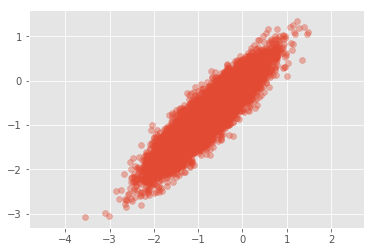





Matrix sampling correlation for IQ high group:
 [[1.         0.10724848]
 [0.10724848 1.        ]]


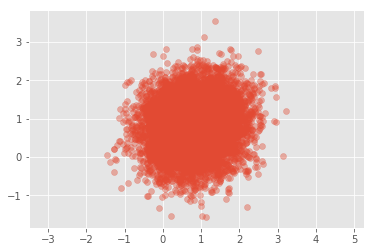





Matrix sampling correlation for overall group:
 [[1.         0.82147716]
 [0.82147716 1.        ]]


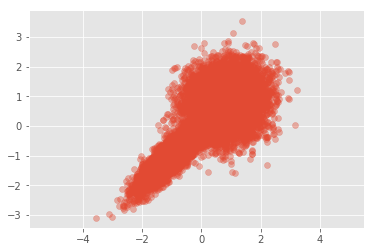






Unconditional sampling correlation: 0.8214771563151201


In [20]:
print('\nUnconditional sampling correlation:', unconditional_correlation(Corr_low_choice, Corr_high_choice))